# Material Refreshment
Brian Ivan Cusuanto

T061664

## 1) Could you list down each three algorithms for both Regression and Classification model in Supervised ML?

- Regression:
  1. Linear Regression
  2. Ridge Regression
  3. Lasso Regression

- Classification:
  1. Support Vector Classification
  2. Random Forest Classifier
  3. XGBoost Classifier

## 2) Please write down the equation of Multiple Linear Regression model along with its 4 common assumption!

Multiple Linear Regression's equation:

`y = b0 + b1 * x1 + ... + bn * xn`

4 Common assumption:
1. Normality
2. Linearity
3. Non-multicolinearity
4. homoscedasticity

## 3) What are the benefits of using WoE? Please mention at least two benefits!

The benefits of using WoE:
1. woe is quite powerful for outliers, when some outliers are entered into the model it can affect but with the presence of WoE, the outlier could be included to the binning. And the problem is clear.
2. woe is quite powerful with the Missing value problems. When it comes to NaN imputation, we tend to fill it with the majority value, where the reality is not in accordance with the facts in this woe, we do binning so that this NaN could be keeped into a separate value.

## 4) What are the rule selection metrics you can use in a Decision Tree (Classifier)?
Rule selection metrics in a Decicision Tree Classifier:
1. Gini
2. Entropy
3. Deviance

## 5) Could you list down 3 differences of Bagging and Boosting methods?

| Bagging | Boosting |
| --- | --- |
| Result is generated by taking average or majority vote of the prediction. | Result is generated on the prediction latest model. |
| Helps when it's applied on overfitted model. | Have tendency to overfit on training data. |
| Doesn't help much with models having high bias. | It updates weights of the samples, where misclassified sample would have higher weight. |

# Analysis Challenge
As a Financing Company, the user wants you to build a credit scoring model to predict whether the client will default or not after their loan application.
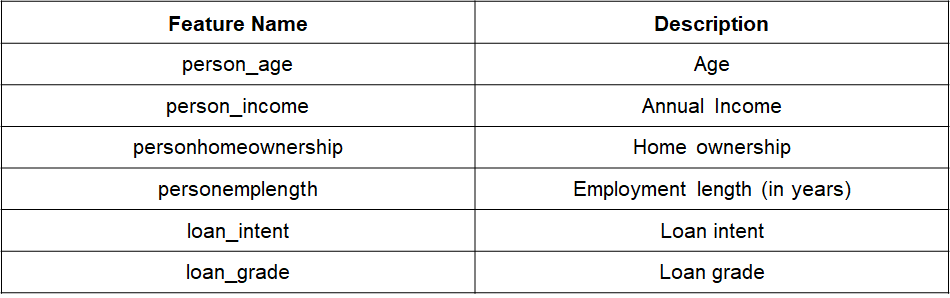

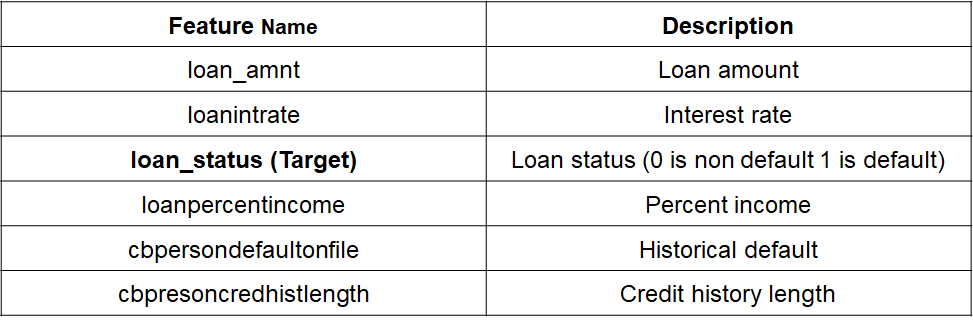

Please do following step for you to solve this problem:
1. Try to use feature transformation (WoE is prefered) before modeling step.
2. Split your data into several sample set (Train/Valid is good, including holdout sample will be better).
3. Perform any feature selection technique would be encouraged.
4. Create classification model (LogReg and Xgboost are prefered) and compare the performance and its stability.

## Preprocessing

In [1]:
# import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit = pd.read_csv('C:\\Users\\brian\\Documents\\DataScience\\ODP BNI x Mars\\06-Supervised Learning\\credit_risk_dataset.csv')
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
print(f"This dataset will be divided into {0.2* len(credit)+1:.0f} for holdout sample, the rest {len(credit) - 0.2* len(credit):.0f} is for training and testing model.")

This dataset will be divided into 6517 for holdout sample, the rest 26065 is for training and testing model.


In [3]:
credit.info()


# kolom yang ada null
  # person_emp_length
  # loan_amnt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


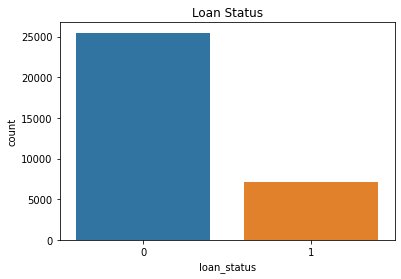

In [4]:
sns.countplot(credit['loan_status'])
plt.title('Loan Status')
plt.show()

# has more non default applicant (0) than the default (1)

In [5]:
# percentage of loan_status

(credit['loan_status'].value_counts() / len(credit) * 100).to_frame().T

,0,1
loan_status,78.183604,21.816396


## Descriptive Analysis

In [6]:
# Numerical
credit.describe().T

# The average of:
#   age                   = 27 years old
#   income                = $ 66,074
#   employee length       = 4,7 years
#   loan amount           = $ 9589
#   loan interest rate    = 11,01 %
#   loan percent income   = 0.17
#   Credit history length = 5,8 years

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
# Categorical
credit.describe(include = 'object').T

# The most of:
#   Home Ownership          = Rent
#   Loan intent             = Education
#   Loan Grade              = A
#   Historical default      = No

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


## Null Columns

In [8]:
# List Columns with NaN
print('Total columns with nan:',len(credit.columns[credit.isna().any()]))

# kolom yang ada null:
  # person_emp_length
  # loan_amnt

Total columns with nan: 2


In [9]:
# Null Percentage
credit.isnull().sum() / len(credit) * 100

# kolom yang ada null:
  # person_emp_length   = 2.747%
  # loan_amnt           = 9.564%

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### person_emp_length

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


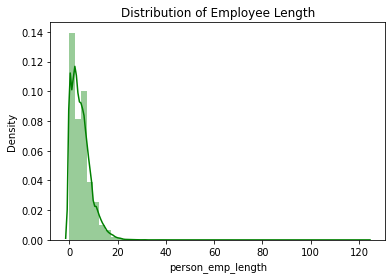

In [10]:
# person_emp_length

sns.distplot(credit['person_emp_length'], color = 'green')
plt.title('Distribution of Employee Length')
plt.show()

In [11]:
credit.describe()['person_emp_length'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
person_emp_length,31686.0,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0


In [12]:
# filling the nulls with the median

print(f"There are {credit['person_emp_length'].isnull().sum()} null value in 'person_emp_length' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

credit['person_emp_length'] = credit['person_emp_length'].fillna(credit['person_emp_length'].median())
print(f"There are {credit['person_emp_length'].isnull().sum()} null value in 'person_emp_length' column.")

There are 895 null value in 'person_emp_length' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'person_emp_length' column.


In [13]:
credit.isnull().sum() / len(credit) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [14]:
credit.describe()['person_emp_length'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
person_emp_length,32581.0,4.767994,4.087372,0.0,2.0,4.0,7.0,123.0


### loan_int_rate

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


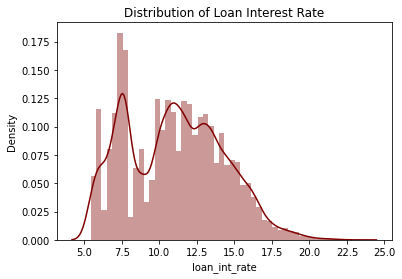

In [15]:
sns.distplot(credit['loan_int_rate'], color = 'maroon')
plt.title('Distribution of Loan Interest Rate')
plt.show()

In [16]:
credit.describe()['loan_int_rate'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22


In [17]:
# filling the nulls with the mean

print(f"There are {credit['loan_int_rate'].isnull().sum()} null value in 'loan_int_rate' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

credit['loan_int_rate'] = credit['loan_int_rate'].fillna(credit['loan_int_rate'].mean())
print(f"There are {credit['loan_int_rate'].isnull().sum()} null value in 'loan_int_rate' column.")

There are 3116 null value in 'loan_int_rate' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'loan_int_rate' column.


In [18]:
credit.isnull().sum() / len(credit) * 100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [19]:
credit.describe()['loan_int_rate'].to_frame().T

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,32581.0,11.011695,3.081605,5.42,8.49,11.011695,13.11,23.22


## Outliers
person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length 

c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

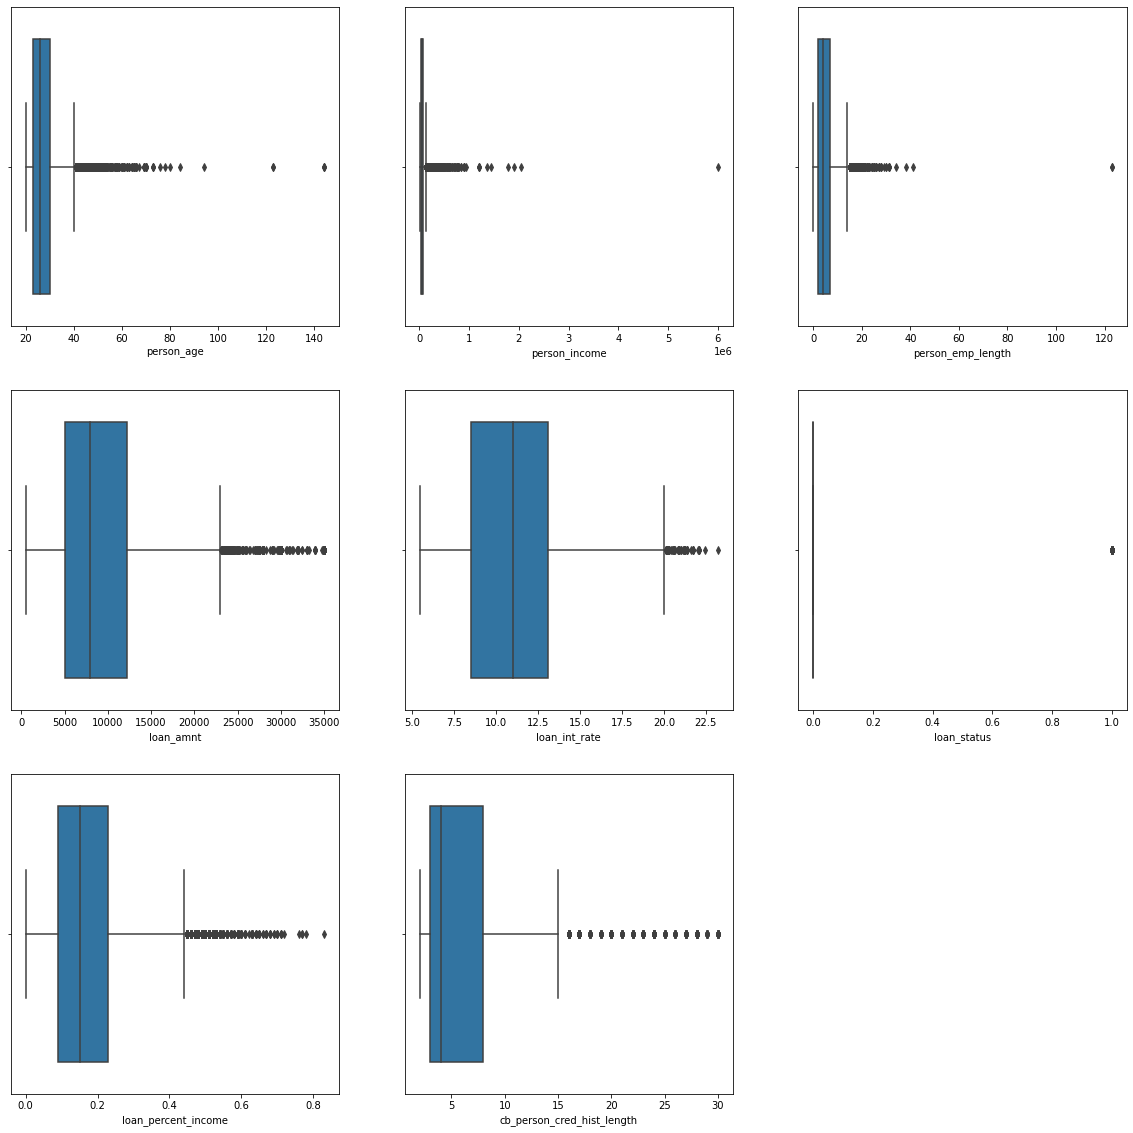

In [20]:
plt.figure(figsize = (20,20))

n = 1
for name in credit.describe().columns:
  plt.subplot(3,3,n)
  sns.boxplot(credit[name])
  n += 1

plt.show()

## WoE

karena keterbatasan waktu dan codes, jadi WoE semampunya aja mas hehe

paham konsepnya, belum terbiasa menginterpretasikan ke WoE-nya. even sudah copy-paste pun masih belum dapat hasil binning yang diharapkan seperti yang sudah dipraktekan kemarin.

In [21]:
credit.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### person_age

In [22]:
feature = 'person_age'
target = 'loan_status'

binning=[-float("inf"), 30, 50, float("inf")]

bin_feature = pd.cut(credit[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
woe_age = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_age

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 30.0]",0.758097,0.775605,0.022832,0.002431
"(30.0, 50.0]",0.233463,0.214125,-0.086463,0.002431
"(50.0, inf]",0.008440,0.010270,0.196220,0.002431


In [23]:
credit[f'{feature}_WOE'] = pd.cut(credit[feature], bins=binning, labels=[0.0228, -0.08646, 0.119622])
# credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
# credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].replace('Nan', -0.403)
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)

In [24]:
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.0228
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.0228
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.0228
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.0228
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.0228


### person_home_ownership

In [25]:
feature = 'person_home_ownership'
target = 'loan_status'

woe_home = (pd.crosstab(credit[feature],
                        credit[target],
                      normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_home

loan_status,0,1,woe,iv
person_home_ownership,,,,
MORTGAGE,0.461430,0.237760,-0.663067,0.376998
OTHER,0.002905,0.004643,0.468841,0.376998
OWN,0.093864,0.027153,-1.240379,0.376998
RENT,0.441801,0.730445,0.502794,0.376998


### person_emp_length

In [26]:
feature = 'person_emp_length'
target = 'loan_status'

binning=[-float("inf"), 1, 5, 30, 50, float("inf")]

bin_feature = pd.cut(credit[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
woe_emplength = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_emplength

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 1.0]",0.198916,0.274761,0.323016,0.048336
"(1.0, 5.0]",0.427786,0.439364,0.026705,0.048336
"(5.0, 30.0]",0.373022,0.285594,-0.267068,0.048336
"(30.0, 50.0]",0.000236,0.000141,-0.515361,0.048336
"(50.0, inf]",0.000039,0.000141,1.276398,0.048336


In [27]:
credit[f'{feature}_WOE'] = pd.cut(credit[feature], bins=binning, labels=[0.323, 0.0267, -0.267, -0.5154, 1.276])
credit[f'{feature}_WOE'] = credit[f'{feature}_WOE'].astype(float)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_WOE,person_emp_length_WOE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.0228,1.2760
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.0228,0.0267
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.0228,0.3230
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.0228,0.0267
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.0228,-0.2670


### loan_intent

In [28]:
feature = 'loan_intent'
target = 'loan_status'

woe_intent = (pd.crosstab(credit[feature],
                        credit[target],
                      normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_intent

loan_status,0,1,woe,iv
loan_intent,,,,
DEBTCONSOLIDATION,0.146115,0.209623,0.360913,0.095752
EDUCATION,0.209712,0.156303,-0.293941,0.095752
HOMEIMPROVEMENT,0.104581,0.132386,0.235757,0.095752
MEDICAL,0.174695,0.228053,0.266537,0.095752
PERSONAL,0.173635,0.154474,-0.116930,0.095752
VENTURE,0.191261,0.119162,-0.473161,0.095752


### loan_grade

In [29]:
feature = 'loan_grade'
target = 'loan_status'

woe_grade = (pd.crosstab(credit[feature],
                        credit[target],
                      normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_grade

loan_status,0,1,woe,iv
loan_grade,,,,
A,0.380952,0.150957,-0.925682,0.881736
B,0.343501,0.239308,-0.361439,0.881736
C,0.200958,0.188379,-0.064638,0.881736
D,0.058297,0.301210,1.642256,0.881736
E,0.013465,0.087366,1.869999,0.881736
F,0.002787,0.023917,2.149517,0.881736
G,0.000039,0.008863,5.419533,0.881736


### loan_amnt

In [30]:
feature = 'loan_amnt'
target = 'loan_status'

binning=[-float("inf"), 10, float("inf")]

bin_feature = pd.cut(credit[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
woe_loan = (pd.crosstab(bin_feature,
                       credit[target],
                       normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_loan

loan_status,0,1,woe,iv
row_0,,,,
"(10.0, inf]",1.0,1.0,0.0,0.0


### cb_person_default_on_file

In [31]:
feature = 'cb_person_default_on_file'
target = 'loan_status'

woe_histdef = (pd.crosstab(credit[feature],
                        credit[target],
                      normalize='columns')
             .assign(woe=lambda creditx: np.log(creditx[1] / creditx[0]))
             .assign(iv=lambda creditx: np.sum(creditx['woe']*
                                           (creditx[1]-creditx[0]))))

woe_histdef

loan_status,0,1,woe,iv
cb_person_default_on_file,,,,
N,0.859734,0.694429,-0.213533,0.164011
Y,0.140266,0.305571,0.778641,0.164011


## Feature Engineering

In [32]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
 12  person_age_WOE              32581 non-null  float64
 13  person_emp_length_WOE       325

### Dummy Variable

In [33]:
# dummy variable for categorical features

credit = pd.concat([credit,pd.get_dummies(credit[['person_home_ownership', 'loan_intent']],
                               drop_first=True)], axis=1).reset_index(drop=True)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_age_WOE,person_emp_length_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0.0228,1.2760,0,0,1,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0.0228,0.0267,0,1,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0.0228,0.3230,0,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0.0228,0.0267,0,0,1,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0.0228,-0.2670,0,0,1,0,0,1,0,0


### One Hot Encoding

In [34]:
# transform categorical into binary value

credit['cb_person_default_on_file'] = credit['cb_person_default_on_file'].map({
    'Y' : 1,
    'N' : 0
})

credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_age_WOE,person_emp_length_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0.0228,1.2760,0,0,1,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0.0228,0.0267,0,1,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0.0228,0.3230,0,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0.0228,0.0267,0,0,1,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0.0228,-0.2670,0,0,1,0,0,1,0,0


In [35]:
# ordinal categorical

grade_encode = {}
v = 1

for n in sorted(credit['loan_grade'].unique()):
  grade_encode[n] = v
  v += 1

grade_encode

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [36]:
credit['loan_grade'] = credit['loan_grade'].map(grade_encode)
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_age_WOE,person_emp_length_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,PERSONAL,4,35000,16.02,1,0.59,...,0.0228,1.2760,0,0,1,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,2,1000,11.14,0,0.10,...,0.0228,0.0267,0,1,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,3,5500,12.87,1,0.57,...,0.0228,0.3230,0,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,3,35000,15.23,1,0.53,...,0.0228,0.0267,0,0,1,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,3,35000,14.27,1,0.55,...,0.0228,-0.2670,0,0,1,0,0,1,0,0


## Splitting Data

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
# dataset for modelling
credit_model = credit.loc[:26064]

# dataset for holdout sample
credit_holdout = credit.loc[26064:]

In [40]:
len(credit_model)

26065

In [41]:
credit_model.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_age_WOE,person_emp_length_WOE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,PERSONAL,4,35000,16.02,1,0.59,...,0.0228,1.2760,0,0,1,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,2,1000,11.14,0,0.10,...,0.0228,0.0267,0,1,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,3,5500,12.87,1,0.57,...,0.0228,0.3230,0,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,3,35000,15.23,1,0.53,...,0.0228,0.0267,0,0,1,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,3,35000,14.27,1,0.55,...,0.0228,-0.2670,0,0,1,0,0,1,0,0


In [42]:
credit_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26065 entries, 0 to 26064
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   26065 non-null  int64  
 1   person_income                26065 non-null  int64  
 2   person_home_ownership        26065 non-null  object 
 3   person_emp_length            26065 non-null  float64
 4   loan_intent                  26065 non-null  object 
 5   loan_grade                   26065 non-null  int64  
 6   loan_amnt                    26065 non-null  int64  
 7   loan_int_rate                26065 non-null  float64
 8   loan_status                  26065 non-null  int64  
 9   loan_percent_income          26065 non-null  float64
 10  cb_person_default_on_file    26065 non-null  int64  
 11  cb_person_cred_hist_length   26065 non-null  int64  
 12  person_age_WOE               26065 non-null  float64
 13  person_emp_lengt

In [43]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517 entries, 26064 to 32580
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   6517 non-null   int64  
 1   person_income                6517 non-null   int64  
 2   person_home_ownership        6517 non-null   object 
 3   person_emp_length            6517 non-null   float64
 4   loan_intent                  6517 non-null   object 
 5   loan_grade                   6517 non-null   int64  
 6   loan_amnt                    6517 non-null   int64  
 7   loan_int_rate                6517 non-null   float64
 8   loan_status                  6517 non-null   int64  
 9   loan_percent_income          6517 non-null   float64
 10  cb_person_default_on_file    6517 non-null   int64  
 11  cb_person_cred_hist_length   6517 non-null   int64  
 12  person_age_WOE               6517 non-null   float64
 13  person_emp_le

In [44]:
# Splitting dataset for feature selection

X_init = credit_model.drop(['loan_status','person_home_ownership', 'loan_intent'], axis = 1)
y_init = credit_model['loan_status']

X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_init, 
                                                                        y_init, 
                                                                        test_size = 0.2, 
                                                                        random_state = 88, 
                                                                        stratify = y_init)

## Feature Selection

In [45]:
# using LogReg with L1 regularization

initial = LogisticRegression(penalty= 'l1',
                             C = 1,
                             solver = 'liblinear')
initial.fit(X_train_init, y_train_init)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [46]:
feature_importance_df = pd.DataFrame(
    {
        'feature': X_init.columns,
        'importance': abs(initial.coef_)[0],        
    }
)
select_from_model = feature_importance_df.sort_values(by='importance', ascending=False)
select_from_model

,feature,importance
6,loan_percent_income,13.393946
9,person_age_WOE,2.140175
12,person_home_ownership_OWN,1.607596
18,loan_intent_VENTURE,0.957904
3,loan_grade,0.949228
13,person_home_ownership_RENT,0.851994
14,loan_intent_EDUCATION,0.835431
17,loan_intent_PERSONAL,0.478938
10,person_emp_length_WOE,0.401500
15,loan_intent_HOMEIMPROVEMENT,0.303498


In [47]:
# selecting importance > 0.30

selected_feat =   ['loan_percent_income', 'person_age_WOE',
         'person_home_ownership_OWN', 'loan_intent_VENTURE', 'loan_grade',
         'loan_intent_EDUCATION', 'person_home_ownership_RENT',
         'loan_intent_PERSONAL', 'person_emp_length_WOE',
         'loan_intent_HOMEIMPROVEMENT', 'loan_status']

# masking dataset for modelling purposes
credit_selected = credit_model[selected_feat]

# masking dataset for holdout purposes
credit_holdout  = credit_holdout[selected_feat]

In [48]:
credit_selected.head()

,loan_percent_income,person_age_WOE,person_home_ownership_OWN,loan_intent_VENTURE,loan_grade,loan_intent_EDUCATION,person_home_ownership_RENT,loan_intent_PERSONAL,person_emp_length_WOE,loan_intent_HOMEIMPROVEMENT,loan_status
0,0.59,0.0228,0,0,4,0,1,1,1.2760,0,1
1,0.10,0.0228,1,0,2,1,0,0,0.0267,0,0
2,0.57,0.0228,0,0,3,0,0,0,0.3230,0,1
3,0.53,0.0228,0,0,3,0,1,0,0.0267,0,1
4,0.55,0.0228,0,0,3,0,1,0,-0.2670,0,1


In [49]:
credit_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26065 entries, 0 to 26064
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_percent_income          26065 non-null  float64
 1   person_age_WOE               26065 non-null  float64
 2   person_home_ownership_OWN    26065 non-null  uint8  
 3   loan_intent_VENTURE          26065 non-null  uint8  
 4   loan_grade                   26065 non-null  int64  
 5   loan_intent_EDUCATION        26065 non-null  uint8  
 6   person_home_ownership_RENT   26065 non-null  uint8  
 7   loan_intent_PERSONAL         26065 non-null  uint8  
 8   person_emp_length_WOE        26065 non-null  float64
 9   loan_intent_HOMEIMPROVEMENT  26065 non-null  uint8  
 10  loan_status                  26065 non-null  int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 1.1 MB


In [50]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517 entries, 26064 to 32580
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_percent_income          6517 non-null   float64
 1   person_age_WOE               6517 non-null   float64
 2   person_home_ownership_OWN    6517 non-null   uint8  
 3   loan_intent_VENTURE          6517 non-null   uint8  
 4   loan_grade                   6517 non-null   int64  
 5   loan_intent_EDUCATION        6517 non-null   uint8  
 6   person_home_ownership_RENT   6517 non-null   uint8  
 7   loan_intent_PERSONAL         6517 non-null   uint8  
 8   person_emp_length_WOE        6517 non-null   float64
 9   loan_intent_HOMEIMPROVEMENT  6517 non-null   uint8  
 10  loan_status                  6517 non-null   int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 292.9 KB


## Modelling

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score

In [52]:
def evaluate(true, predicted):
    auc = roc_auc_score(true, predicted)
    accuracy = accuracy_score(true, predicted)
    f1s = f1_score(true, predicted)
    return accuracy,f1s,auc

def print_evaluate(true, predicted):
    
    auc = roc_auc_score(true, predicted)
    accuracy = accuracy_score(true, predicted)
    f1s = f1_score(true, predicted)

    print(' Accuracy:', accuracy)
    print(' F1-score:', f1s)
    print(' AUC:', auc)

In [53]:
# Splitting into Train and Test set

X = credit_selected.drop('loan_status', axis = 1)
y = credit_selected['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 88, 
                                                    stratify = y)

In [54]:
# Scaling for distance based algorithm

scaler_robust = RobustScaler()

X_train_sc = scaler_robust.fit_transform(X_train)
X_test_sc = scaler_robust.transform(X_test)

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Logistic Regression

In [56]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-5,5,20),
    "max_iter" : [100, 500, 1000]
}

grid_lr = RandomizedSearchCV(
    estimator = lr_t,
    param_distributions = param_lr,
    cv = 10,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [57]:
grid_lr.fit(X_train_sc, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84853386 0.84853386        nan 0.8485434         nan
        nan        nan 0.84853386 0.84853386]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   scoring='roc_auc', verbose=3)

In [58]:
grid_lr.best_params_

{'penalty': 'l2', 'max_iter': 100, 'C': 1.8329807108324339}

In [59]:
pred_lrt = grid_lr.predict(X_test_sc)
train_lrt = grid_lr.predict(X_train_sc)

In [60]:
print('Train set evaluation:')
print_evaluate(y_train, train_lrt)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_lrt)

Train set evaluation:
 Accuracy: 0.8457222328793401
 F1-score: 0.5808469055374593
 AUC: 0.7152015545227558


Test set evaluation:
 Accuracy: 0.8517168616919241
 F1-score: 0.5984415584415586
 AUC: 0.7248635949708059


In [61]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Accuracy', 'F1-Score','AUC']
                                    ])

result_lrt = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_lrt)),
         'Test' : list(evaluate(y_test, pred_lrt))}
         ).unstack().values], 
         columns = index)

result_lrt.insert(loc=0, column='Model', value = 'LogisticRegression')
result_lrt

Model     Train                          Test            \
                       Accuracy  F1-Score       AUC  Accuracy  F1-Score   
0  LogisticRegression  0.845722  0.580847  0.715202  0.851717  0.598442   

             
        AUC  
0  0.724864

### Random Forest

In [62]:
rf_t = RandomForestClassifier()
param_rf = {
    "n_estimators" : [10,25,30,50],
    "max_depth" : [1,2,4,5,6],
    "min_samples_leaf" : np.linspace(0.07, 0.2, 30),
}

grid_rf = RandomizedSearchCV(
    estimator = rf_t,
    param_distributions = param_rf,
    cv = 10,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [63]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 5, 6],
                                        'min_samples_leaf': array([0.07      , 0.07448276, 0.07896552, 0.08344828, 0.08793103,
       0.09241379, 0.09689655, 0.10137931, 0.10586207, 0.11034483,
       0.11482759, 0.11931034, 0.1237931 , 0.12827586, 0.13275862,
       0.13724138, 0.14172414, 0.1462069 , 0.15068966, 0.15517241,
       0.15965517, 0.16413793, 0.16862069, 0.17310345, 0.17758621,
       0.18206897, 0.18655172, 0.19103448, 0.19551724, 0.2       ]),
                                        'n_estimators': [10, 25, 30, 50]},
                   scoring='roc_auc', verbose=3)

In [64]:
grid_rf.best_params_

{'n_estimators': 10, 'min_samples_leaf': 0.07448275862068966, 'max_depth': 4}

In [65]:
pred_rft = grid_rf.predict(X_test)
train_rft = grid_rf.predict(X_train)

In [66]:
print('Train set evaluation:')
print_evaluate(y_train, train_rft)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_rft)

Train set evaluation:
 Accuracy: 0.8112890849798581
 F1-score: 0.26926648096564526
 AUC: 0.5775921679703988


Test set evaluation:
 Accuracy: 0.8158450028774218
 F1-score: 0.2972181551976574
 AUC: 0.5871778422284633


In [67]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Accuracy', 'F1-Score','AUC']
                                    ])
result_rft = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_rft)),
         'Test' : list(evaluate(y_test, pred_rft))}
         ).unstack().values], 
         columns=index)

result_rft.insert(loc=0, column='Model', value = 'RandomForest')
result_rft

Model     Train                          Test                    
                 Accuracy  F1-Score       AUC  Accuracy  F1-Score       AUC
0  RandomForest  0.811289  0.269266  0.577592  0.815845  0.297218  0.587178

### XGBoost

In [68]:
xg_t = XGBClassifier()

param_xg = {
    "n_estimators" : [10, 20, 25, 30, 50, 100],
    "learning_rate" : np.linspace(0.08, 4, 20),
    "subsample" : [0.1, 0.5, 1, 4, 7]
}

grid_xg = RandomizedSearchCV(
    estimator = xg_t,
    param_distributions = param_xg,
    cv = 10,
    scoring = 'roc_auc',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 100
)

In [69]:
grid_xg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[13:27:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\brian\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84389968 0.60869142 0.85716784        nan 0.81592276
 0.65516123 0.73508287        nan 0.72693449 0.75036818 0.68024609
 0.82947038 0.64214608 0.62692391        nan 0.77044794        nan
 0.86111107 0.85095025 0.68774239 0.61922883 0.86775609        nan
        nan 0.87682649        nan        nan 0.62859194        nan
 0.68024609        nan 0.59334379        nan        nan        nan
 0.67053161 0.58861934        nan 0.68027476        nan 0.6952726
 0.86903176        nan        nan 0.66374419 0.64919664 0.69835049
        nan        nan 0.67118991 0.64919664        nan 0.6207546
 0.63352122        nan 0.59652497        nan        nan 0.87619367
 0.68774239 0.62859194        nan 0.61922883 0.83727504 0.87546931
 0.68657082        nan        nan        nan        nan        nan
 0.67702193        nan 0.8

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.08      , 0.28631579, 0.49263158, 0.69894737, 0.90526316,
       1.111578

In [70]:
grid_xg.best_params_

{'subsample': 1, 'n_estimators': 20, 'learning_rate': 0.2863157894736842}

In [71]:
pred_xgt = grid_xg.predict(X_test)
train_xgt = grid_xg.predict(X_train)

In [72]:
print('Train set evaluation:')
print_evaluate(y_train, train_xgt)

print('\n')

print('Test set evaluation:')
print_evaluate(y_test, pred_xgt)

Train set evaluation:
 Accuracy: 0.9078745444082102
 F1-score: 0.7483296213808464
 AUC: 0.8033194579538759


Test set evaluation:
 Accuracy: 0.9052369077306733
 F1-score: 0.7443064182194616
 AUC: 0.80323027175572


In [73]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test'], 
                                    ['Accuracy', 'F1-Score', 'AUC']
                                    ])
result_xgt = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_xgt)),
         'Test' : list(evaluate(y_test, pred_xgt))}
         ).unstack().values], 
         columns=index)

result_xgt.insert(loc=0, column='Model', value = 'XGBoost')
result_xgt

Model     Train                         Test                   
            Accuracy F1-Score       AUC  Accuracy  F1-Score      AUC
0  XGBoost  0.907875  0.74833  0.803319  0.905237  0.744306  0.80323

## Model Results

In [74]:
result_all = pd.concat(
    [result_lrt, 
     result_rft, 
     result_xgt], 
     axis=0)

In [75]:
result_all

Model     Train                          Test            \
                       Accuracy  F1-Score       AUC  Accuracy  F1-Score   
0  LogisticRegression  0.845722  0.580847  0.715202  0.851717  0.598442   
0        RandomForest  0.811289  0.269266  0.577592  0.815845  0.297218   
0             XGBoost  0.907875  0.748330  0.803319  0.905237  0.744306   

             
        AUC  
0  0.724864  
0  0.587178  
0  0.803230

## Holdout Sample

In [89]:
credit_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517 entries, 26064 to 32580
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_percent_income          6517 non-null   float64
 1   person_age_WOE               6517 non-null   float64
 2   person_home_ownership_OWN    6517 non-null   uint8  
 3   loan_intent_VENTURE          6517 non-null   uint8  
 4   loan_grade                   6517 non-null   int64  
 5   loan_intent_EDUCATION        6517 non-null   uint8  
 6   person_home_ownership_RENT   6517 non-null   uint8  
 7   loan_intent_PERSONAL         6517 non-null   uint8  
 8   person_emp_length_WOE        6517 non-null   float64
 9   loan_intent_HOMEIMPROVEMENT  6517 non-null   uint8  
 10  loan_status                  6517 non-null   int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 292.9 KB


In [93]:
# Imbalanced target too

credit_holdout['loan_status'].value_counts() / len(credit_holdout) * 100

0    80.036827
1    19.963173
Name: loan_status, dtype: float64

In [84]:
# Define X and y for predict the holdout sample

X_holdout = credit_holdout.drop('loan_status', 
                                axis = 1)
y_holdout = credit_holdout['loan_status']

### Logistic Regression

In [86]:
# without scaler

holdout_lr = grid_lr.predict(X_holdout)
print_evaluate(y_holdout, holdout_lr)

 Accuracy: 0.29706920362129813
 F1-score: 0.3583134892842135
 AUC: 0.5545242598897497


In [91]:
# with scaler

holdout_lr = grid_lr.predict(scaler_robust.transform(X_holdout))
print_evaluate(y_holdout, holdout_lr)

 Accuracy: 0.8625134264232008
 F1-score: 0.5889908256880734
 AUC: 0.7240147238084909


In [94]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Accuracy', 'F1-Score','AUC']
                                    ])

result_holdout_lr = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_lrt)),
         'Test' : list(evaluate(y_test, pred_lrt)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_lr))}
         ).unstack().values], 
         columns = index)

result_holdout_lr.insert(loc=0, column='Model', value = 'LogisticRegression')
result_holdout_lr

Model     Train                          Test            \
                       Accuracy  F1-Score       AUC  Accuracy  F1-Score   
0  LogisticRegression  0.845722  0.580847  0.715202  0.851717  0.598442   

            Holdout Sample                      
        AUC       Accuracy  F1-Score       AUC  
0  0.724864       0.862513  0.588991  0.724015

### Random Forest

In [87]:
holdout_rf = grid_rf.predict(X_holdout)
print_evaluate(y_holdout, holdout_rf)

 Accuracy: 0.8315175694337885
 F1-score: 0.2776315789473684
 AUC: 0.5803245969358162


In [98]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Accuracy', 'F1-Score','AUC']
                                    ])

result_holdout_rf = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_rft)),
         'Test' : list(evaluate(y_test, pred_rft)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_rf)) }
         ).unstack().values], 
         columns = index)

result_holdout_rf.insert(loc=0, column='Model', value = 'RandomForest')
result_holdout_rf

Model     Train                          Test                      \
                 Accuracy  F1-Score       AUC  Accuracy  F1-Score       AUC   
0  RandomForest  0.811289  0.269266  0.577592  0.815845  0.297218  0.587178   

  Holdout Sample                      
        Accuracy  F1-Score       AUC  
0       0.831518  0.277632  0.580325

### XGBoost

In [88]:
holdout_xg = grid_xg.predict(X_holdout)
print_evaluate(y_holdout, holdout_xg)

 Accuracy: 0.9176001227558692
 F1-score: 0.7588684328693309
 AUC: 0.8169856216077297


In [99]:
index = pd.MultiIndex.from_product([
                                    ['Train', 'Test', 'Holdout Sample'], 
                                    ['Accuracy', 'F1-Score','AUC']
                                    ])

result_holdout_xg = pd.DataFrame(
    [pd.DataFrame(
        {'Train' : list(evaluate(y_train, train_xgt)),
         'Test' : list(evaluate(y_test, pred_xgt)),
         'Holdout Sample' : list(evaluate(y_holdout, holdout_xg))}
         ).unstack().values], 
         columns = index)

result_holdout_xg.insert(loc=0, column='Model', value = 'XGBoost')
result_holdout_xg

Model     Train                         Test                     \
            Accuracy F1-Score       AUC  Accuracy  F1-Score      AUC   
0  XGBoost  0.907875  0.74833  0.803319  0.905237  0.744306  0.80323   

  Holdout Sample                      
        Accuracy  F1-Score       AUC  
0         0.9176  0.758868  0.816986

## Holdout Sample Result

In [100]:
holdout_all = pd.concat(
                        [result_holdout_lr, 
                        result_holdout_rf, 
                        result_holdout_xg], 
                        axis=0)
holdout_all

Model     Train                          Test            \
                       Accuracy  F1-Score       AUC  Accuracy  F1-Score   
0  LogisticRegression  0.845722  0.580847  0.715202  0.851717  0.598442   
0        RandomForest  0.811289  0.269266  0.577592  0.815845  0.297218   
0             XGBoost  0.907875  0.748330  0.803319  0.905237  0.744306   

            Holdout Sample                      
        AUC       Accuracy  F1-Score       AUC  
0  0.724864       0.862513  0.588991  0.724015  
0  0.587178       0.831518  0.277632  0.580325  
0  0.803230       0.917600  0.758868  0.816986

## Conclusions
Since this case is an imbalanced dataset `(non-default:78.2% ; default:21.8%)`, it's worth looking at the AUC and F1-score metrics instead. It can be seen in the table above, the model that has the highest and the most stable AUC and F1-Score with each value is `XGBoost AUC: 0.80323` and `XGBoost F1: 0.744306`.

In addition, the F1score and AUC scores on the train and test are not much different. It means that we can conclude that this model is 'just right' to classify `target 1` and `target 0`, neither overfitting nor underfitting.

If we look back at the features importance by Logistic Regression with Lasso regularization, the selected features seem make sense. Features which affect `loan_status` are:
1. Percentage of Income *`('loan_percent_income')`*, 
2. Age *`('person_age_WOE')`*,
3. Owning Home *`('person_home_ownership_OWN')`*, 
4. Intention for Venture *`('loan_intent_VENTURE')`*, 
5. Loan Grade *`('loan_grade')`*,
6. Intention for Education *`('loan_intent_EDUCATION')`*, 
7. Renting home *`('person_home_ownership_RENT')`*,
8. Intention for personal purposes *`('loan_intent_PERSONAL')`*, 
9. Employement Length *`('person_emp_length_WOE')`*,        
10. Intention for home improvement *`('loan_intent_HOMEIMPROVEMENT')`*.

After tuning the models and get each metrics, we could predict the holdout sample using our previous models. We see that the XGBoost algorithm shows its best performance among the others. In the holdout sample, XGBoost can reach the `AUC: 0.81699` and the `F1-score: 0.75887`. It tells us that XGBoost could be our model for production, because it's not overfitted and it can predicts the holdout sample very well.